In [2]:
!pip install scikit-learn pandas matplotlib seaborn joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("Dataset Shape:", X.shape)
X.head()

Dataset Shape: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
default_rf = RandomForestClassifier(random_state=42)
default_rf.fit(X_train, y_train)

default_pred = default_rf.predict(X_test)
default_accuracy = accuracy_score(y_test, default_pred)

print("Default Random Forest Accuracy:", default_accuracy)

Default Random Forest Accuracy: 0.956140350877193


In [10]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [12]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5]
}

In [14]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 5, 10],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [16]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}


In [18]:
tuned_pred = best_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, tuned_pred)

print("Tuned Model Accuracy:", tuned_accuracy)

Tuned Model Accuracy: 0.9473684210526315


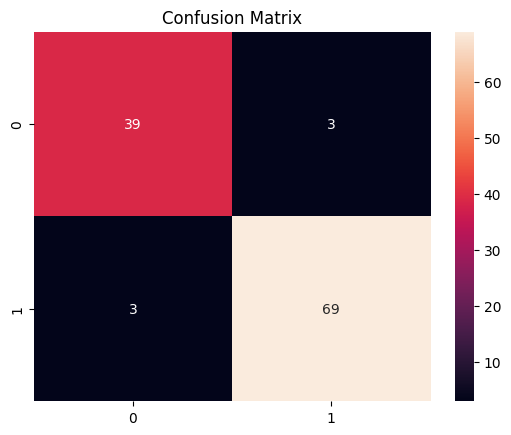

In [20]:
cm = confusion_matrix(y_test, tuned_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [22]:
# Save Best Parameters
with open("best_parameters.txt", "w") as f:
    f.write(str(best_params))

# Save Classification Report
report = classification_report(y_test, tuned_pred)

with open("classification_report.txt", "w") as f:
    f.write(report)

# Save Comparison Table
comparison = pd.DataFrame({
    "Model": ["Default Random Forest", "Tuned Random Forest"],
    "Accuracy": [default_accuracy, tuned_accuracy]
})

comparison.to_csv("model_comparison.csv", index=False)

# Save Model
joblib.dump(best_model, "tuned_model.pkl")

print("All files saved successfully!")

All files saved successfully!


In [23]:
from google.colab import files
files.download("model_comparison.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>